<a href="https://colab.research.google.com/github/KhanhPham248/rl-dynamics-control/blob/main/chapters%20/lectures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2.1 Giới thiệu con lắc đơn


## 2.1.1. Phương trình chuyển động



**Phương trình chuyển động (Equation of Motion - EoM) của con lắc đơn được viết như sau:**
$$ml^{2}\ddot{\theta} + b\dot{\theta} + mgl \sin \theta = u$$

Phương trình này thực chất là sự cân bằng Mô-men:
**Mô-men Quán tính + Mô-men Cản + Mô-men Trọng trường = Mô-men Điều khiển**

 **Các thành phần chính:**
* **Không gian cấu hình (Configuration Space - $q$):** Ở đây $q=\theta$. Chúng ta dùng một tọa độ suy rộng duy nhất là góc $\theta$.
* **Biến trạng thái (State Vector - $x$):** Để mô tả trọn vẹn hệ thống tại một thời điểm, ta cần biết "nó đang ở đâu" và "nó đang đi nhanh thế nào".
    $$x=[\theta, \dot{\theta}]^{T} \text{ hay } [q, \dot{q}]$$
* **Input ($u$):**
    * Đây là Mô-men xoắn điều khiển (control torque) tác động vào trục quay.
    * Vai trò: Là tác nhân bên ngoài can thiệp vào hệ thống để thay đổi hành vi tự nhiên của nó.
* **Kernel (Cấu trúc động lực học):** Đây là "bộ xử lý" tự nhiên của hệ thống, chuyển đổi trạng thái hiện tại và đầu vào thành gia tốc tiếp theo. Nó bao gồm 3 khối:
    1.  **Khối Quán tính (Inertial Term - $ml^{2}\ddot{\theta}$):**
        * $ml^{2}$ là Moment quán tính (I). Nó đóng vai trò như "khối lượng" trong chuyển động quay.
        * Nó kháng lại sự thay đổi vận tốc. Hệ số càng lớn, hệ càng "ì".
    2.  **Khối Tiêu tán (Damping Term - $b\dot{\theta}$):**
        * Tuyến tính theo vận tốc.
        * Vai trò: Rút năng lượng khỏi hệ thống, làm hệ thống ổn định dần về trạng thái nghỉ nếu không có $u$.
    3.  **Khối Hồi quy Phi tuyến (Gravitational Term - $mgl \sin \theta$):**
        * Đây là "kẻ gây rối" chính. Hàm $\sin \theta$ làm cho hệ thống trở nên Phi tuyến (Non-linear).
        * Nếu $\theta$ nhỏ, $\sin \theta \approx \theta$ (hệ tuyến tính hóa). Nhưng khi $\theta$ lớn (như khi ta muốn vung con lắc lên đỉnh), tính chất phi tuyến này quyết định tất cả.

 **Output (Phản ứng của hệ thống):**

Về mặt toán học, phương trình trên cho ta tìm được $\ddot{\theta}$ (gia tốc góc).
Từ gia tốc $\ddot{\theta}$ qua phép tích phân theo thời gian, ta cập nhật được vận tốc $\dot{\theta}$ và vị trí $\theta$ cho bước tiếp theo.

## 2.1.2. Bài toán động học thuận


Việc cố tìm ra một công thức toán học $x(t)=...$ cho con lắc đơn là vô cùng khó khăn và không cần thiết.
Lời giải giải tích (Analytical Solution) tồn tại, nhưng nó vô dụng về mặt trực giác kỹ thuật.
Tác giả đề xuất chuyển sang **Phương pháp Đồ thị (Graphical Solution Methods)**.

### Phương pháp Đồ thị
Thay vì hỏi: "Tại thời điểm $t=5s,$ con lắc ở góc nào?" (Khó).
Máy tính sẽ hỏi: "Tại góc $\theta$ và vận tốc $\dot{\theta}$ hiện tại, con lắc sẽ trôi về hướng nào?" (Dễ).

1.  **Vẽ Trường Vector (Vector Field):**     Tại mỗi điểm $(x, y)$ trên mặt phẳng toạ độ, vẽ một mũi tên chỉ hướng chuyển động dựa trên phương trình vi phân $\dot{x}=f(x)$.

2.  **Quan sát Dòng chảy (Flow):**
    Nhìn tập hợp các mũi tên, ta thấy được "dòng chảy" của hệ thống.
    * Chỗ nào dòng chảy cuộn tròn? $\rightarrow$ Dao động.
    * Chỗ nào dòng chảy toà ra? $\rightarrow$ Mất ổn định.
    * Chỗ nào dòng chảy tụ lại? $\rightarrow$ Ổn định.

$\rightarrow$ Đây là tư duy định tính (Qualitative), không phải định lượng (Quantitative). Nó cho ta cái nhìn tổng quan (Global view) mà không cần giải phương trình.


# 2.2 Overdamped pendulum



## 2.2.1 Điều kiện của overdamped


Ta có hai loại lực cản trở chuyển động:
1. Lực Ma sát: $F_{damping} \sim b \cdot \dot{\theta}$ (Tỉ lệ với vận tốc).
2. Lực Quán tính: $F_{inertia} \sim ml^{2} \cdot \ddot{\theta}$ (Tỉ lệ với gia tốc).

Ta lựa chọn $b \cdot \dot{\theta} \gg ml^{2} \cdot \ddot{\theta}$ để lực ma sát hoàn toàn áp đảo lực quán tính.
Giả sử con lắc đang dao động với tần số tự nhiên $\omega_{n}=\sqrt{g/l}$.
* Vận tốc đặc trưng $\dot{\theta} \approx \omega_{n}$
* Gia tốc đặc trưng $\ddot{\theta} \approx \omega_{n}^{2}$

Từ đây suy ra điều kiện:
$$b \ge ml^{2}\sqrt{\frac{g}{l}}$$

Khi đó $ml^{2}\ddot{\theta}+b\dot{\theta} \approx b\dot{\theta}$, trải phẳng không gian, đặt biến $\theta=x$ từ đó phương trình động lực học được viết lại là:
$$ml^{2}\ddot{x}+b\dot{x} \approx b\dot{x} = u_{0}-mgl \sin x$$

Với $u_0 = 0$ ta có đồ thị:

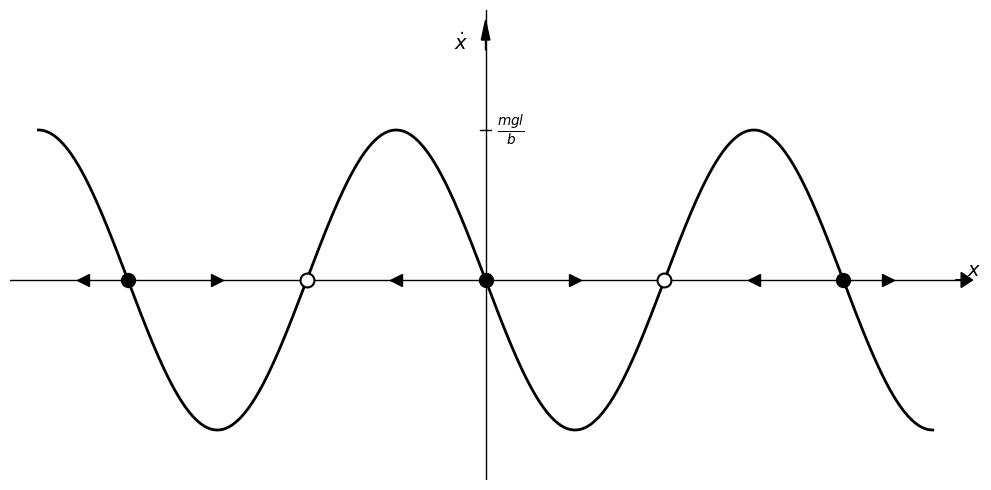

In [ ]:
# @title
import numpy as np
import matplotlib.pyplot as plt

def ve_do_thi_overdamped():
    # 1. Cấu hình dữ liệu
    # Tạo dữ liệu x từ -2.5pi đến 2.5pi
    x = np.linspace(-2.5*np.pi, 2.5*np.pi, 500)

    # Hàm số: y = -sin(x) (Mô phỏng phương trình dx/dt = -mgl/b * sin(x))
    # Chọn biên độ A = 1.5 để vẽ cho đẹp
    A = 1.5
    y = -A * np.sin(x)

    # 2. Khởi tạo hình vẽ
    fig, ax = plt.subplots(figsize=(10, 5))

    # --- VẼ CÁC TRỤC ---
    # Trục hoành (x-axis)
    ax.axhline(0, color='black', linewidth=1)
    # Mũi tên trục hoành
    ax.arrow(2.5*np.pi + 0.4, 0, 0.1, 0, head_width=0.15, head_length=0.2, fc='black', ec='black', clip_on=False)
    ax.text(2.5*np.pi + 0.6, 0.1, r'$x$', fontsize=14, va='center')

    # Trục tung (y-axis) - Nét liền
    ax.axvline(0, color='black', linestyle='-', linewidth=1) # Changed to solid line
    # Mũi tên trục tung (hướng lên trên cùng)
    ax.arrow(0, A + 0.8, 0, 0.1, head_width=0.15, head_length=0.2, fc='black', ec='black', clip_on=False)
    ax.text(-0.3, A + 0.8, r'$\dot{x}$', fontsize=14, ha='right') # Corrected x-dot notation

    # --- VẼ ĐỒ THỊ ---
    ax.plot(x, y, color='black', linewidth=2)

    # --- VẼ CÁC ĐIỂM CÂN BẰNG (Equilibrium Points) ---
    # Stable points at k*2*pi, Unstable points at (2k+1)*pi

    # 1. Điểm cân bằng BỀN (Stable - Chấm đen)
    stable_points = [-2*np.pi, 0, 2*np.pi]
    # Filter stable points to be within the new x-range
    stable_points = [p for p in stable_points if -2.5*np.pi <= p <= 2.5*np.pi]
    ax.plot(stable_points, [0]*len(stable_points), 'o', color='black', markersize=10, zorder=5)

    # 2. Điểm cân bằng KHÔNG BỀN (Unstable - Vòng tròn trắng)
    unstable_points = [-np.pi, np.pi]
    # Filter unstable points to be within the new x-range
    unstable_points = [p for p in unstable_points if -2.5*np.pi <= p <= 2.5*np.pi]
    ax.plot(unstable_points, [0]*len(unstable_points), 'o', markerfacecolor='white', markeredgecolor='black', markeredgewidth=1.5, markersize=10, zorder=5)

    # --- VẼ MŨI TÊN CHỈ HƯỚNG DÒNG CHẢY (FLOW ARROWS) ---
    # Logic: dot(x) = -A*sin(x)
    # If dot(x) > 0 (sin(x) < 0), x increases -> Right arrow (>)
    # If dot(x) < 0 (sin(x) > 0), x decreases -> Left arrow (<)

    # From -2.5pi to 2.5pi:
    # (-2.5pi, -2pi): sin(x) > 0 -> dot(x) < 0 -> Left arrow
    ax.plot(-2.25*np.pi, 0, marker='<', color='black', markersize=8)
    # (-2pi, -pi): sin(x) < 0 -> dot(x) > 0 -> Right arrow
    ax.plot(-1.5*np.pi, 0, marker='>', color='black', markersize=8)
    # (-pi, 0): sin(x) > 0 -> dot(x) < 0 -> Left arrow
    ax.plot(-0.5*np.pi, 0, marker='<', color='black', markersize=8)
    # (0, pi): sin(x) < 0 -> dot(x) > 0 -> Right arrow
    ax.plot(0.5*np.pi, 0, marker='>', color='black', markersize=8)
    # (pi, 2pi): sin(x) > 0 -> dot(x) < 0 -> Left arrow
    ax.plot(1.5*np.pi, 0, marker='<', color='black', markersize=8)
    # (2pi, 2.5pi): sin(x) < 0 -> dot(x) > 0 -> Right arrow
    ax.plot(2.25*np.pi, 0, marker='>', color='black', markersize=8)

    # --- CHÚ THÍCH (Labels) ---
    # Ký hiệu biên độ mgl/b trên trục tung
    ax.plot([-0.1, 0.1], [A, A], color='black', linewidth=1) # Gạch ngang nhỏ
    ax.text(0.2, A, r'$\frac{mgl}{b}$', fontsize=14, va='center')

    # --- CẤU HÌNH KHUNG HÌNH ---
    ax.axis('off') # Tắt khung bao quanh mặc định
    ax.set_ylim(-A - 0.5, A + 1.2)
    ax.set_xlim(-2.5*np.pi - 0.5, 2.5*np.pi + 0.5) # Extended x-axis limits

    plt.tight_layout()
    plt.show()

ve_do_thi_overdamped()

## 2.2.2 Tính ổn định của hệ thống



### 2.2.1. Lý thuyết
* **Fixed point:** là các điểm $x^{*}$ mà tại đó $\dot{x}=0$.
* **Unstable (Mất ổn định):** Giống như đặt hòn bi trên đỉnh quả núi (hoặc cái bát úp ngược).
    * Đẩy nhẹ sang phải $(\delta>0)$: Bi lăn tuột xuống dốc bên phải $(\dot{x}>0 \rightarrow$ xa dần).
    * Đẩy nhẹ sang trái $(\delta<0)$: Bi lăn tuột xuống dốc bên trái $(\dot{x}<0 \rightarrow$ xa dần).
    * Kết luận: Chỉ cần một cú hích nhỏ, nó sẽ bỏ đi mãi mãi.
* **Locally Stable (Ổn định địa phương):** Giống như đặt hòn bi dưới đáy cái bát. Đẩy nhẹ sang phải/trái: Hòn bi sẽ xu hướng lăn quay trở lại đáy.

### 2.2.2. Công thức toán
1. **Lyapunov Stable (Ổn định i.s.L.) - "Không đi lạc"**
   * Định nghĩa: Với mọi $\epsilon>0$ (sân chơi), tồn tại $\delta>0$ (lồng khởi tạo) sao cho: $|x(0)|<\delta \Rightarrow |x(t)|<\epsilon, \forall t \ge 0$.
   * Dịch nghĩa: "Nếu xuất phát đủ gần, nó sẽ mãi mãi ở gần".

2. **Attractive (Hấp dẫn) - "Có quay về"**
   * Định nghĩa: Nếu $|x(0)|<\delta$ thì $\lim_{t\rightarrow\infty}x(t)=0$.
   * Nghịch lý: Một hệ thống có thể Attractive nhưng KHÔNG Stable.

3. **Asymptotically Stable (Ổn định tiệm cận) - "Chuẩn mực"**
   * Công thức: = Lyapunov Stable + Attractive.
   * Dịch nghĩa: "Nó không đi quá xa (Stable) VÀ nó từ từ chui về đích (Attractive)".

4. **Exponentially Stable (Ổn định mũ) - "Về đích thần tốc"**
   * Công thức: $|x(t)| \le C \cdot |x(0)| \cdot e^{-\alpha t}$ (với $\alpha>0$).
   * Vai trò: Đây là "tiêu chuẩn vàng" của kỹ sư điều khiển.

### 2.2.3. Cách thức xác định tính ổn định
1. **Kiểm tra bằng Đạo hàm (Linearization)**
   Với hệ 1 chiều $\dot{x}=f(x)$. Tại điểm cân bằng $x^{*}$ thì $f(x^{*})=0$. Tính đạo hàm $A=\frac{df}{dx}(x^{*})$.
   * if $A>0$: Unstable (Đẩy ra xa).
   * if $A<0$: Locally Asymptotically Stable (Hút về).
   * if $A==0$: Chưa kết luận được.

2. **Kiểm tra bằng Hàm Lyapunov**
   Nếu $V(x)$ dương và đạo hàm $\dot{V}(x)$ âm (năng lượng luôn giảm) $\rightarrow$ Asymptotically Stable.

### 2.2.4. Ví dụ neuron
Phương trình mô tả hệ thống Neuron tự kích thích (Autapse) - mô hình Working Memory:
$$\dot{x}=-x+\tanh(w \cdot x)$$

**Cơ chế lưu trữ (Bifurcation)**:
Điểm mấu chốt nằm ở giá trị của trọng số w (Synaptic Weight):
* **Trường hợp 1: $w<1$ (Quên):**
    Lực rò rỉ $(-x)$ mạnh hơn lực hồi tiếp. Hệ thống chỉ có 1 điểm cân bằng duy nhất tại $x^{*}=0$.
* **Trường hợp 2: $w>1$ (Nhớ):**
    Lực hồi tiếp (tanh) đủ mạnh để thắng lực rò rỉ. Xuất hiện 3 điểm cân bằng:
    1. $x^{*}=0$ (Mất ổn định - Unstable).
    2. $x^{*} \approx +A$ (Ổn định - Stable): Trạng thái "ON".
    3. $x^{*} \approx -A$ (Ổn định - Stable): Trạng thái "OFF".
    $\rightarrow$ Hệ thống trở thành Bistable (Lưỡng ổn định).


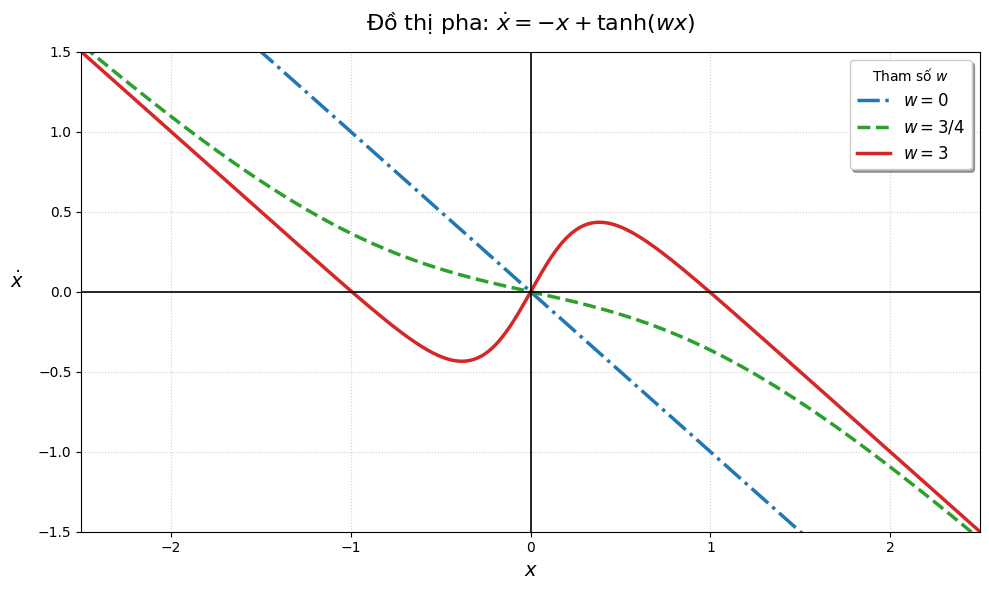

In [ ]:
# @title
import numpy as np
import matplotlib.pyplot as plt

def ve_do_thi_neuron_dynamics():
    """
    Vẽ đồ thị pha của phương trình vi phân neuron: dx/dt = -x + tanh(w*x)
    với các giá trị w khác nhau.
    """
    # 1. Khởi tạo dữ liệu
    # Tạo khoảng giá trị x từ -3 đến 3 để quan sát rõ các điểm giao cắt
    x = np.linspace(-3, 3, 600)

    # Danh sách các giá trị w cần vẽ
    # w = 0; w = 3/4 (0.75); w = 3
    w_values = [0, 0.75, 3]

    # Cấu hình giao diện (Màu sắc và kiểu nét vẽ để phân biệt)
    colors = ['#1f77b4', '#2ca02c', '#d62728']  # Xanh dương, Xanh lá, Đỏ
    linestyles = ['-.', '--', '-']             # Nét gạch chấm, Nét đứt, Nét liền
    labels = [r'$w=0$', r'$w=3/4$', r'$w=3$']  # Nhãn hiển thị LaTeX

    # 2. Tạo khung hình
    fig, ax = plt.subplots(figsize=(10, 6))

    # 3. Vẽ đồ thị cho từng giá trị w
    for i, w in enumerate(w_values):
        # Phương trình động lực học: x_dot = -x + tanh(w * x)
        x_dot = -x + np.tanh(w * x)

        ax.plot(x, x_dot,
                label=labels[i],
                color=colors[i],
                linestyle=linestyles[i],
                linewidth=2.5)

    # 4. Trang trí đồ thị chuyên nghiệp
    # Vẽ trục tọa độ (x=0 và y=0) đậm hơn để làm mốc
    ax.axhline(0, color='black', linewidth=1.2)
    ax.axvline(0, color='black', linewidth=1.2)

    # Thêm lưới (grid) mờ để dễ nhìn tọa độ
    ax.grid(True, linestyle=':', alpha=0.6)

    # Đặt tên tiêu đề và trục (Sử dụng LaTeX cho đẹp)
    ax.set_title(r'Đồ thị pha: $\dot{x} = -x + \tanh(wx)$', fontsize=16, pad=15)
    ax.set_xlabel(r'$x$', fontsize=14)
    ax.set_ylabel(r'$\dot{x}$', fontsize=14, rotation=0, labelpad=15)

    # Hiển thị chú thích (Legend)
    ax.legend(title="Tham số $w$", fontsize=12, loc='best', shadow=True)

    # Giới hạn trục để hình ảnh tập trung vào vùng quan trọng
    ax.set_xlim(-2.5, 2.5)
    ax.set_ylim(-1.5, 1.5)

    # 5. Xuất hình ảnh
    plt.tight_layout()
    plt.show()

# Chạy hàm vẽ
ve_do_thi_neuron_dynamics()

### **Mô phỏng cơ chế Ghi nhớ (Memory Latching)**

**Phương trình động lực học:**
Hệ thống được mô tả bởi phương trình vi phân sau:

$$\dot{x} = -x + \tanh(w \cdot x) + u(t)$$

**Trong đó:**
* $w > 1$ (Ví dụ chọn $w = 2$): Điều kiện cần để hệ thống có tính chất lưỡng ổn định (bistability), tạo ra 2 điểm cân bằng bền.
* $u(t)$: Tín hiệu đầu vào (xung kích thích điều khiển).

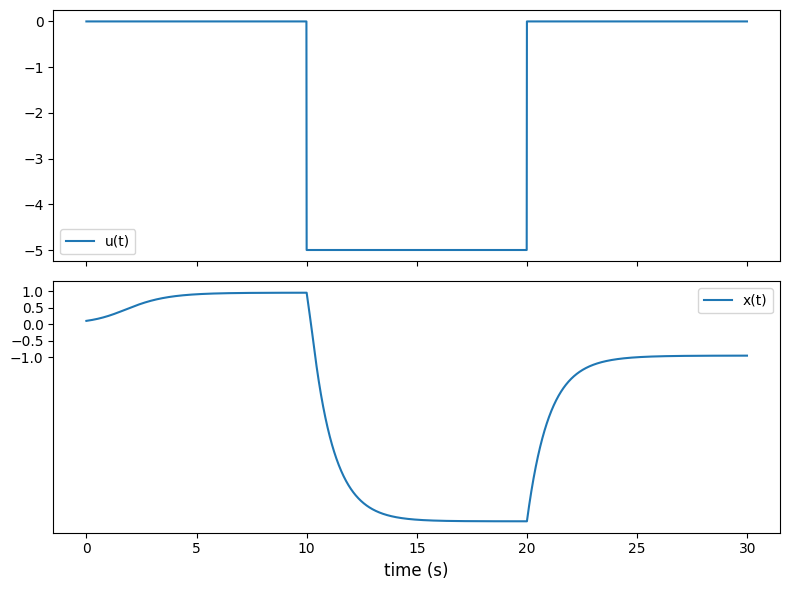

In [ ]:
# @title Đồ thị mô phỏng cơ chế ghi nhớ
import numpy as np
import matplotlib.pyplot as plt

def ve_do_thi_memory_latching():
    # 1. Cấu hình tham số mô phỏng
    dt = 0.01
    t = np.arange(0, 30, dt)
    n = len(t)

    # Khởi tạo mảng x và u
    x = np.zeros(n)
    u = np.zeros(n)

    # Điều kiện ban đầu: x(0) = 0.1 (hơi lệch về phía dương để nó tự trôi về +1)
    x[0] = 0.1

    # Tham số w (Trọng số kết nối). Cần w > 1 để có tính nhớ.
    w = 2.0

    # 2. Tạo tín hiệu đầu vào u(t) giống hình mẫu
    # Từ 0-10s: u = 0
    # Từ 10-20s: u = -5 (Xung âm cực mạnh để 'reset' trạng thái)
    # Từ 20-30s: u = 0
    for i in range(n):
        if 10 <= t[i] < 20:
            u[i] = -5.0
        else:
            u[i] = 0.0

    # 3. Giải phương trình vi phân bằng phương pháp Euler
    # Phương trình: dx/dt = -x + tanh(w*x) + u
    for i in range(n - 1):
        dxdt = -x[i] + np.tanh(w * x[i]) + u[i]
        x[i+1] = x[i] + dxdt * dt

    # 4. Vẽ đồ thị
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6), sharex=True)

    # --- Subplot 1: Tín hiệu đầu vào u(t) ---
    ax1.plot(t, u, label='u(t)', color='#1f77b4', linewidth=1.5)
    ax1.legend(loc='lower left')
    ax1.grid(False) # Hình mẫu không có lưới
    # Tinh chỉnh trục y để giống hình mẫu
    ax1.set_yticks([0, -1, -2, -3, -4, -5])

    # --- Subplot 2: Trạng thái hệ thống x(t) ---
    ax2.plot(t, x, label='x(t)', color='#1f77b4', linewidth=1.5)
    ax2.legend(loc='upper right')
    ax2.set_xlabel('time (s)', fontsize=12)
    ax2.set_yticks([-1.0, -0.5, 0.0, 0.5, 1.0])

    # Tinh chỉnh giao diện chung
    plt.tight_layout()
    plt.show()

# Chạy hàm vẽ
ve_do_thi_memory_latching()

**Giải thích hiện tượng trong đồ thị:**

1.  **Giai đoạn $t = 0 \to 10s$ ($u = 0$):**
    Hệ thống xuất phát từ $x_0 = 0.1$. Do $w = 2$ (hệ có tính nhớ), trạng thái $x$ tự động bị hút về điểm cân bằng bền dương ($x \approx +1$, trạng thái "ON").

2.  **Giai đoạn $t = 10 \to 20s$ ($u = -5$):**
    Một lực cưỡng bức âm rất mạnh tác động vào hệ thống. Nó ép trạng thái $x$ chuyển từ mức cao $+1$ xuống vùng âm và tiến về gần $-1$.

3.  **Giai đoạn $t = 20 \to 30s$ ($u = 0$):**
    Ngắt tín hiệu điều khiển. Tuy nhiên, thay vì quay trở về trạng thái ban đầu ($+1$), hệ thống bị "bẫy" (latched) lại ở trạng thái cân bằng bền âm mới ($x \approx -1$, trạng thái "OFF").

$\rightarrow$ **Kết luận:** Đây chính là cơ chế hoạt động của một bit bộ nhớ: Nó lưu giữ trạng thái cuối cùng (ON hoặc OFF) ngay cả khi tín hiệu điều khiển đã biến mất.

# 2.3. Energy-shaping control



## 2.3.1. Ý tưởng


Thay vì tư duy theo kiểu cưỡng bức "tôi muốn tay máy đến điểm A ngay lập tức" (điều khiển vị trí), ta tư duy: "Tôi muốn hệ thống có đủ năng lượng để tự nó văng đến điểm A".

* **Năng lượng tổng (E):** Gồm Động năng + Thế năng.
  $$E(q,\dot{q}) = \frac{1}{2}ml^{2}\dot{\theta}^{2} - mgl \cos \theta$$

* **Mục tiêu ($E_{desired}$):** Ta muốn con lắc có vừa đủ năng lượng để đứng im tại đỉnh. Tại đó, vận tốc bằng 0 và thế năng là cực đại ($mgl$). Vậy $E_{desired}=mgl$.

* **Sai số năng lượng ($\tilde{E}$):**
  $$\tilde{E} = E_{hien\_tai} - E_{desired}$$



## 2.3.2. Implementation



### 3.2.1. Chọn dấu
Đi theo chuỗi logic sau:
1. Quan sát ($\tilde{E}$): Hệ thống đang thừa hay thiếu năng lượng?
2. Ra chiến lược ($\dot{E}$): Cần tăng (bơm) hay giảm (xả) năng lượng?

Đạo hàm của năng lượng theo thời gian (Power – công suất): $\dot{E} = u \cdot \dot{\theta}$.
* Để tăng năng lượng ($\dot{E}>0$): Cần tác dụng lực $u$ cùng dấu với vận tốc $\dot{\theta}$ (đẩy xuôi chiều).
* Để giảm năng lượng ($\dot{E}<0$): Cần tác dụng lực $u$ ngược dấu với vận tốc $\dot{\theta}$ (hãm lại).

### 3.2.2. The Controller
Đề xuất công thức điều khiển phi tuyến sau:
$$u = -k \cdot \dot{\theta} \cdot \tilde{E}$$
(Với k là một hằng số dương).

**Phân tích tại sao công thức hoạt động:**
Thế $u$ vào phương trình biến thiên sai số năng lượng $\tilde{E}$:
$$\dot{\tilde{E}} = \dot{E} = u \cdot \dot{\theta} = (-k \cdot \dot{\theta} \cdot \tilde{E}) \cdot \dot{\theta} = -k \cdot \dot{\theta}^{2} \cdot \tilde{E}$$

Vì $k>0$ và $\dot{\theta}^{2} \ge 0$ nên dấu của $\dot{\tilde{E}}$ luôn ngược dấu với $\tilde{E}$.
* Nếu năng lượng thừa ($\tilde{E}>0$) $\rightarrow$ $\dot{\tilde{E}}<0$ (Năng lượng giảm).
* Nếu năng lượng thiếu ($\tilde{E}<0$) $\rightarrow$ $\dot{\tilde{E}}>0$ (Năng lượng tăng).
$\rightarrow$ Hệ thống tự động hội tụ về mức năng lượng mong muốn theo hàm mũ.



## 2.3.3. Đánh giá

Bộ điều khiển này chỉ quan tâm Năng lượng, không quan tâm Vị trí.
Khi con lắc lên đến đỉnh, $u$ sẽ về 0. Nhưng nếu gió thổi nhẹ làm lệch đi một chút mà vẫn giữ nguyên năng lượng, bộ điều khiển sẽ không can thiệp. Con lắc có thể bị rơi xuống.

**Kết luận:** Nó giỏi việc đưa lên (Swing-up), nhưng dở việc giữ thăng bằng (Balancing).

**Chiến thuật "2 giai đoạn"**:
1. **Giai đoạn 1 (Swing-up):** Dùng Energy Shaping để bơm con lắc từ dưới lên vùng lân cận đỉnh.
2. **Giai đoạn 2 (Balancing):** Khi sai số góc đủ nhỏ (ví dụ $\pm10$ độ), ngắt bộ điều khiển năng lượng, bật bộ điều khiển tuyến tính (như LQR hoặc PD) để khóa cứng vị trí tại đỉnh.
"""